In [4]:
import json
import pandas as pd
import altair as alt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filename = 'birds.json'
data_main = pd.read_json(filename)
data_main.head()

,condition,bill_length,bill_depth,sex
0,B,39.1,18.7,male
1,B,39.5,17.4,female
2,B,40.3,18.0,female
3,B,36.7,19.3,female
4,B,39.3,20.6,male


# For your first analysis question, you want to assess if beak_length varies significantly across conditions. 

Create two visualization to compare beak_length by condition: one focused on the mean length, and another focused on the distribution of values.Convey the mean (average) lengths. Plot the average beak_length for each condition. Also include a measure of spread, such as the standard error of the mean or the interquartile range.

<Axes: xlabel='bill_length', ylabel='condition'>

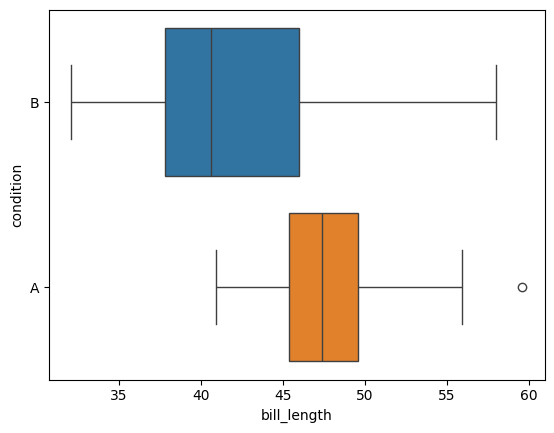

In [6]:
sns.boxplot(data=data_main, x="bill_length", y="condition", hue='condition')

# What measure of spread did you choose, and why?

We used a box plot (showing the interquartile range) so that it's clearer to see how spread out the data is and where the mean lies relative to the outliers and the majority of the data.

# Convey the distribution

Now instead create a visualization intended to better convey the overall distribution of beak_length measurements, again divided by condition. Examples might include plotting raw values, histograms, or density plots.

<Axes: xlabel='bill_length', ylabel='condition'>

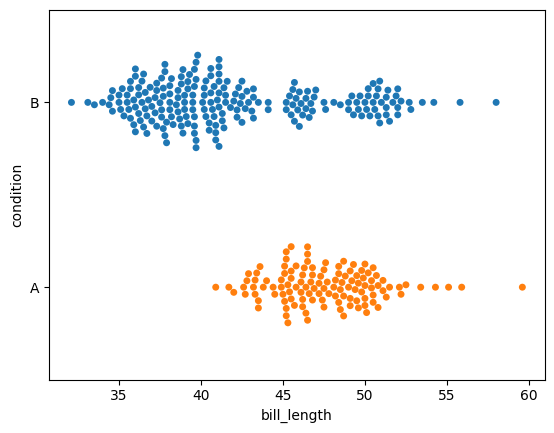

In [18]:
# sns.histplot(data_main, x="bill_length", hue="condition", element="step", kde=True, bins=25)
sns.swarmplot(data_main, x="bill_length", y='condition', hue="condition")

# Based on the charts you've created, how would you describe the difference between condition A and condition B?

Based on the actual points corresponding to the data, we can see that condition A has only one mode close to the mean, but condition B has a larger standard deviation and 3 possible modes for the data, making a box plot a less reliable view of how the data is actually distributed.

# Task 2: Assessing Correlation

Your next task is to assess the relationship between bill_length and bill_depth, again grouped by condition. Below is a scatter plot of the two variables, overlaid with a linear regression model fit to all of the data. Modify the chart to include an additional layer that shows regression fits per condition, with each regression line color coded by condition.

<Axes: xlabel='bill_length', ylabel='bill_depth'>

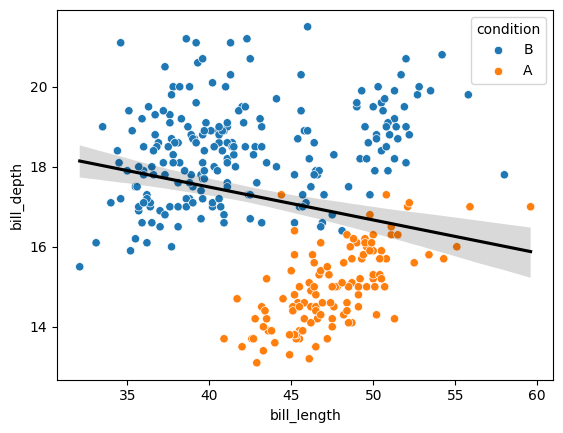

In [23]:
sns.scatterplot(data=data_main, x="bill_length", y="bill_depth", hue="condition")
sns.regplot(x='bill_length', y='bill_depth', data=data_main, scatter=False, ci=95, line_kws={"color": "black"})

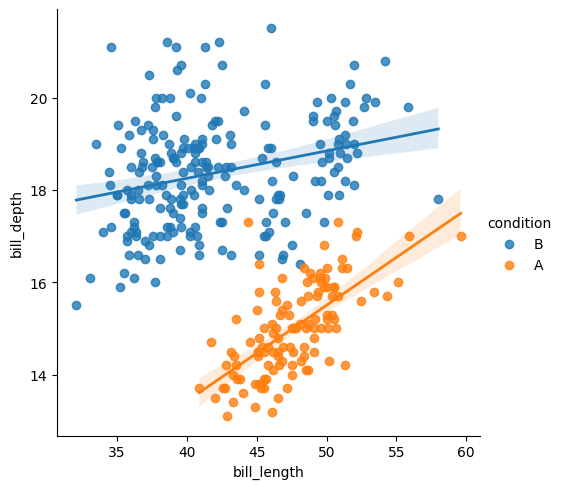

In [28]:
sns.lmplot(x='bill_length', y='bill_depth', hue='condition', data=data_main, line_kws={"linewidth": 2})

# What do the different regression models (overall vs. subdivided) convey? Describe the trends and try to make sense of any potential contradictions you find.
To better convey uncertainty in the regression fits, we added the 95% confidence interval to each point. The overall regression (shown in black above) shows more uncertainty and a worse fit where the data sets overlap and better fits where they don't. Additionally, the overall

The separated regression fits show that the orange dataset has areas of better regression fits, particularly where most of the data is. The regression for condition A however, does show some contradictions when we add the confidence interval to the regression fit. Despite a larger number of points in the top right, there is still quite a bit of uncertainty in the regression fit.


In [44]:
((((18073 + 17847)*10)/8)*.2)/2

4490.0

<Axes: xlabel='votes', ylabel='Count'>

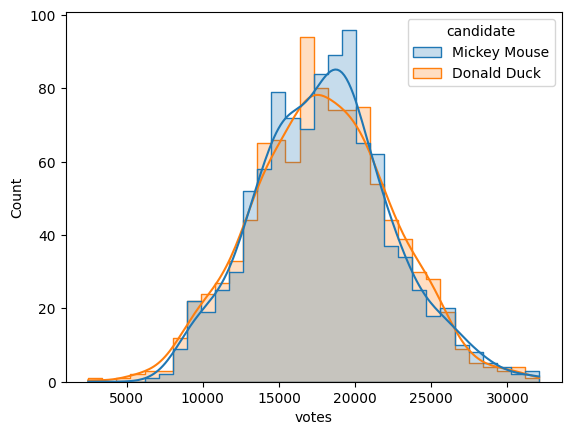

In [49]:
candidates = ["Mickey Mouse", "Donald Duck"]
reported_votes = [18073, 17847]
percent_counted = 0.8
total_votes_estimate = [v / percent_counted for v in reported_votes]

#Made up simulation of random counts for last 20% of votes
df = pd.DataFrame({
    "votes": [reported_votes[0] + np.random.randn() * 4500 for _ in range(1000)],
    "candidate": ["Mickey Mouse"] * 1000
})
df2 = pd.DataFrame({
    "votes": [reported_votes[1] + np.random.randn() * 4500 for _ in range(1000)],
    "candidate": ["Donald Duck"] * 1000
})
df = pd.concat([df, df2])

sns.histplot(data=df, x="votes", hue="candidate", element='step', kde=True)
# sns.kdeplot(data=df, x="votes", hue="candidate", fill=False)

Here, I made up random vote counts for the remaining 20% of data while assuming that both cadidates will get a similar share of the vote coming in. I then made a density plot across different random numbers that were selected for the candidates to potentially see which candidate would win at each random number selection. The race seems to be very close

# In addition to your visualization, address the following questions:

# What aspect of uncertainty are you attempting to convey with your image?

  I am randomly selecting a number of additional votes that each candidate might get and trying to predict the outcome of the election. The random nature of the points is hopefully a convincing way to account for the votes not yet counted.

# How well do you believe your image achieves this goal? Why?

  I think this image might be more helpful after using some more complex forecasting tools!
